kathiravan-24BAD057
Available Columns:
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Open Column: open
Close Column: close
Accuracy: 0.6132971506105834
Precision: 1.0
Recall: 0.030612244897959183
F1 Score: 0.0594059405940594


/tmp/ipython-input-2380409217.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


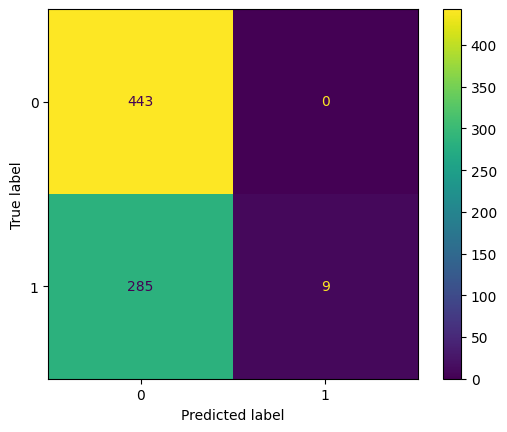

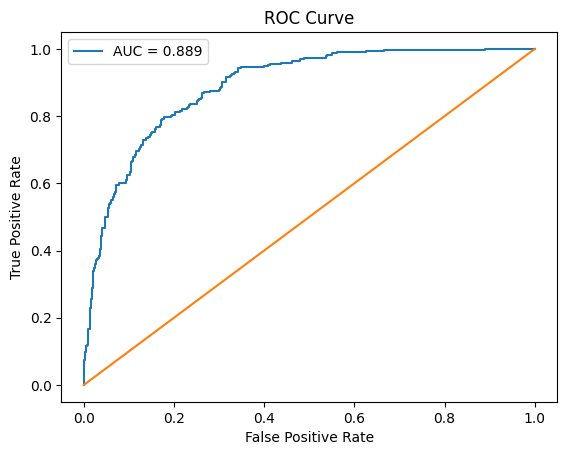

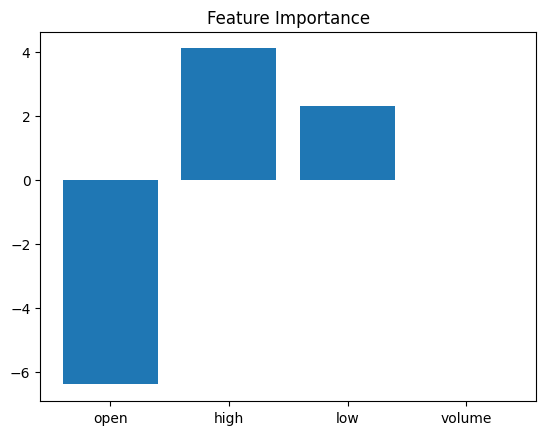

Tuned Accuracy: 0.6051560379918589


In [2]:
print("kathiravan-24BAD057")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
data = pd.read_csv("LICI - 10 minute data.csv")
print("Available Columns:")
print(data.columns)
open_col = None
close_col = None
for col in data.columns:
    if 'open' in col.lower():
        open_col = col
    if 'close' in col.lower():
        close_col = col
print("Open Column:", open_col)
print("Close Column:", close_col)
data['Price_Movement'] = np.where(data[close_col] > data[open_col], 1, 0)
features = [open_col]
for col in data.columns:
    if 'high' in col.lower():
        features.append(col)
    if 'low' in col.lower():
        features.append(col)
    if 'volume' in col.lower():
        features.append(col)
target = 'Price_Movement'
df = data[features + [target]]
df.fillna(df.mean(), inplace=True)
X = df[features]
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc, 3)))
plt.plot([0,1], [0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
importance = model.coef_[0]
plt.bar(features, importance)
plt.title("Feature Importance")
plt.show()
tuned_model = LogisticRegression(C=0.5, penalty='l2', solver='liblinear')
tuned_model.fit(X_train, y_train)
tuned_pred = tuned_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, tuned_pred))